In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
from IPython.display import Image

<div class="alert alert-block alert-warning">

### Apply SVD on face images


</div>

# Read images into trian and test

In [2]:
data_dir = 'E:/data mining/att_faces'

In [3]:
train_faces = []
test_faces = []
y_train_faces=[]
y_test_faces=[]
count=0
count1=0
    
for i in range(1,41):
    current_dir = data_dir + '/s' +str(i)
    for j in range(1,8):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        train_faces.append(im)
        y_train_faces.append('S'+str(i))
        
    for j in range(8,11):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        test_faces.append(im)
        y_test_faces.append('S'+str(i))
        
    count1+=1
    count+=1

In [4]:
len(train_faces)

280

In [5]:
y_train_faces

['S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S1',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S2',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S3',
 'S4',
 'S4',
 'S4',
 'S4',
 'S4',
 'S4',
 'S4',
 'S5',
 'S5',
 'S5',
 'S5',
 'S5',
 'S5',
 'S5',
 'S6',
 'S6',
 'S6',
 'S6',
 'S6',
 'S6',
 'S6',
 'S7',
 'S7',
 'S7',
 'S7',
 'S7',
 'S7',
 'S7',
 'S8',
 'S8',
 'S8',
 'S8',
 'S8',
 'S8',
 'S8',
 'S9',
 'S9',
 'S9',
 'S9',
 'S9',
 'S9',
 'S9',
 'S10',
 'S10',
 'S10',
 'S10',
 'S10',
 'S10',
 'S10',
 'S11',
 'S11',
 'S11',
 'S11',
 'S11',
 'S11',
 'S11',
 'S12',
 'S12',
 'S12',
 'S12',
 'S12',
 'S12',
 'S12',
 'S13',
 'S13',
 'S13',
 'S13',
 'S13',
 'S13',
 'S13',
 'S14',
 'S14',
 'S14',
 'S14',
 'S14',
 'S14',
 'S14',
 'S15',
 'S15',
 'S15',
 'S15',
 'S15',
 'S15',
 'S15',
 'S16',
 'S16',
 'S16',
 'S16',
 'S16',
 'S16',
 'S16',
 'S17',
 'S17',
 'S17',
 'S17',
 'S17',
 'S17',
 'S17',
 'S18',
 'S18',
 'S18',
 'S18',
 'S18',
 'S18',
 'S18',
 'S19',
 'S19',
 'S19',
 'S19',
 'S19',
 'S19',
 'S19',

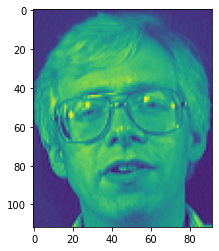

In [6]:
plt.imshow(train_faces[7])

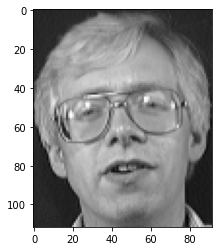

In [7]:
plt.imshow(train_faces[7],'gray')

In [8]:
train_faces[7].shape

(112, 92)

In [9]:
train_faces = np.array(train_faces)
test_faces = np.array(test_faces)

In [10]:
train_faces.shape

(280, 112, 92)

In [11]:
train_faces = train_faces.reshape(train_faces.shape[0],train_faces.shape[1]*train_faces.shape[2])
test_faces = test_faces.reshape(test_faces.shape[0],test_faces.shape[1]*test_faces.shape[2])

In [12]:
train_faces.shape

(280, 10304)

### Apply PCA on faces to obtain eigenvalues and eigenvectors

In [13]:
# Compute a PCA 
n_components = 250
pca = PCA(n_components=n_components, whiten=True).fit(train_faces)
 
# apply PCA transformation
X_train_pca = pca.transform(train_faces)
X_test_pca= pca.transform(test_faces)

In [14]:
X_train_pca.shape

(280, 250)

In [15]:
pca.components_.shape

(250, 10304)

In [16]:
eigenfaces = pca.components_.reshape(250,112,92)

In [17]:
np.dot(pca.components_[5],pca.components_[13])

1.734723475976807e-16

In [18]:
eigenfaces.shape

(250, 112, 92)

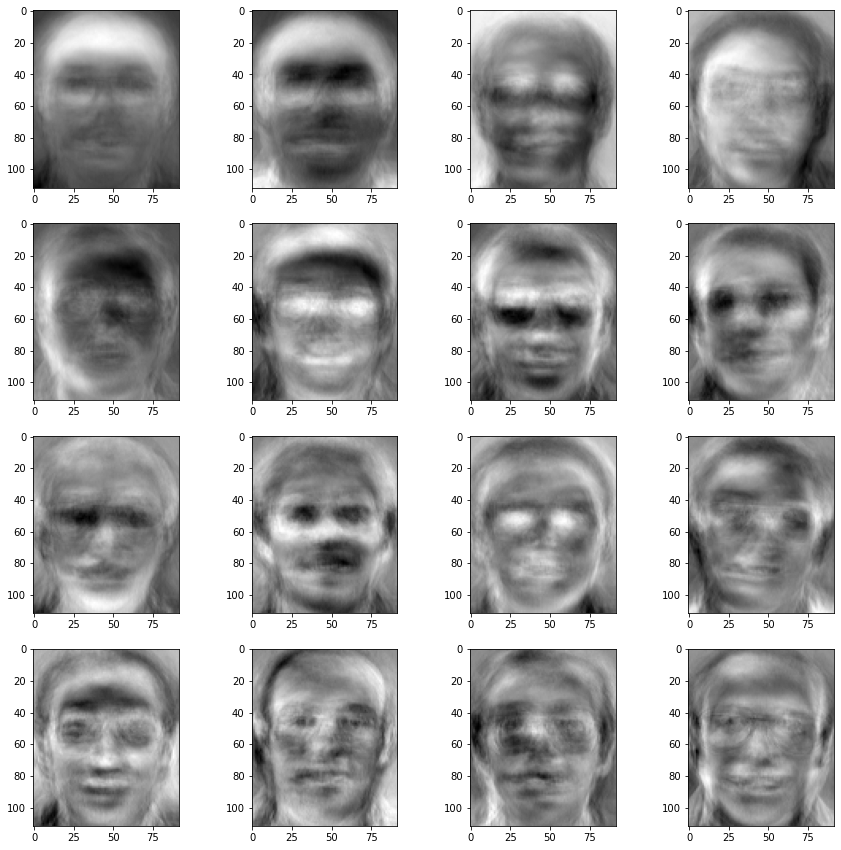

In [19]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')

In [20]:
X_train1 = pca.inverse_transform(X_train_pca)

In [21]:
X_train_pca.shape

(280, 250)

In [22]:
X_train1.shape

(280, 10304)

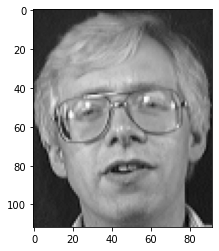

In [23]:
plt.imshow(X_train1[7].reshape(112,92),'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Find the eigenvectors (eigenfaces) and eigenvalues with SVD for the above face dataset

</div>

In [24]:
from scipy.linalg import svd
u,s,v = np.linalg.svd(im, full_matrices=True, compute_uv=True)
#u.shape
#s.shape
v.shape
eigenvalue = s**2
#eigenvalue
eigenvectors1 = np.linalg.eig(im.dot(im.T))[1]
eigenvectors2 = np.linalg.eig(im.T.dot(im))[1]

In [25]:
v

array([[-0.09471088, -0.09474042, -0.09419532, ..., -0.06022964,
        -0.06429319, -0.0692388 ],
       [-0.0397161 , -0.03743613, -0.03949632, ..., -0.14310192,
        -0.12647798, -0.09366125],
       [ 0.08313417,  0.08078993,  0.07951326, ...,  0.19510598,
         0.18108424,  0.14325407],
       ...,
       [-0.26038769,  0.13955122,  0.1451427 , ...,  0.20206635,
         0.00794529, -0.00399032],
       [-0.0007268 , -0.00148706,  0.3314101 , ...,  0.00151577,
         0.06596801, -0.07643715],
       [-0.12764132,  0.28270402,  0.13229294, ..., -0.06241   ,
         0.03287935,  0.11378899]])

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1_1

- Apply KNN(1NN) on the original faces(not reduced ones) and calculate the accuracy for the test set.

- Apply KNN(1NN) on the reduced feature space(after PCA) and calculate the accuracy for the test set.

Compare the result of the two approaches.



</div>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_faces,y_train_faces) 

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred=knn.predict(test_faces)

In [28]:
y_pred

array(['S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3', 'S4', 'S4',
       'S4', 'S5', 'S5', 'S40', 'S6', 'S6', 'S6', 'S7', 'S7', 'S7', 'S8',
       'S8', 'S8', 'S9', 'S9', 'S9', 'S10', 'S10', 'S38', 'S11', 'S11',
       'S11', 'S12', 'S12', 'S12', 'S13', 'S13', 'S13', 'S14', 'S14',
       'S14', 'S15', 'S15', 'S15', 'S1', 'S16', 'S16', 'S17', 'S17',
       'S17', 'S18', 'S18', 'S18', 'S19', 'S15', 'S19', 'S20', 'S20',
       'S20', 'S21', 'S21', 'S21', 'S22', 'S22', 'S22', 'S23', 'S23',
       'S23', 'S24', 'S24', 'S24', 'S25', 'S25', 'S25', 'S26', 'S26',
       'S26', 'S27', 'S27', 'S27', 'S37', 'S28', 'S28', 'S29', 'S29',
       'S29', 'S30', 'S30', 'S30', 'S31', 'S31', 'S31', 'S32', 'S32',
       'S32', 'S33', 'S33', 'S33', 'S34', 'S34', 'S34', 'S35', 'S35',
       'S35', 'S36', 'S36', 'S36', 'S37', 'S37', 'S37', 'S38', 'S38',
       'S38', 'S39', 'S39', 'S39', 'S40', 'S40', 'S5'], dtype='<U3')

In [29]:
from sklearn.metrics import accuracy_score
print('accuracy score of without PCA: ',accuracy_score(y_pred,y_test_faces))

accuracy score of without PCA:  0.95


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train_faces)
y_pred1=knn.predict(X_test_pca)

In [31]:
print('accuracy score of with PCA: ',accuracy_score(y_pred1,y_test_faces))

accuracy score of with PCA:  0.6


the accuracy is low when we use PCA

<div class="alert alert-block alert-warning">

### Decision tree visualiztion and rules extraction


</div>

In [32]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [33]:
np.unique(y)

array([0, 1, 2])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

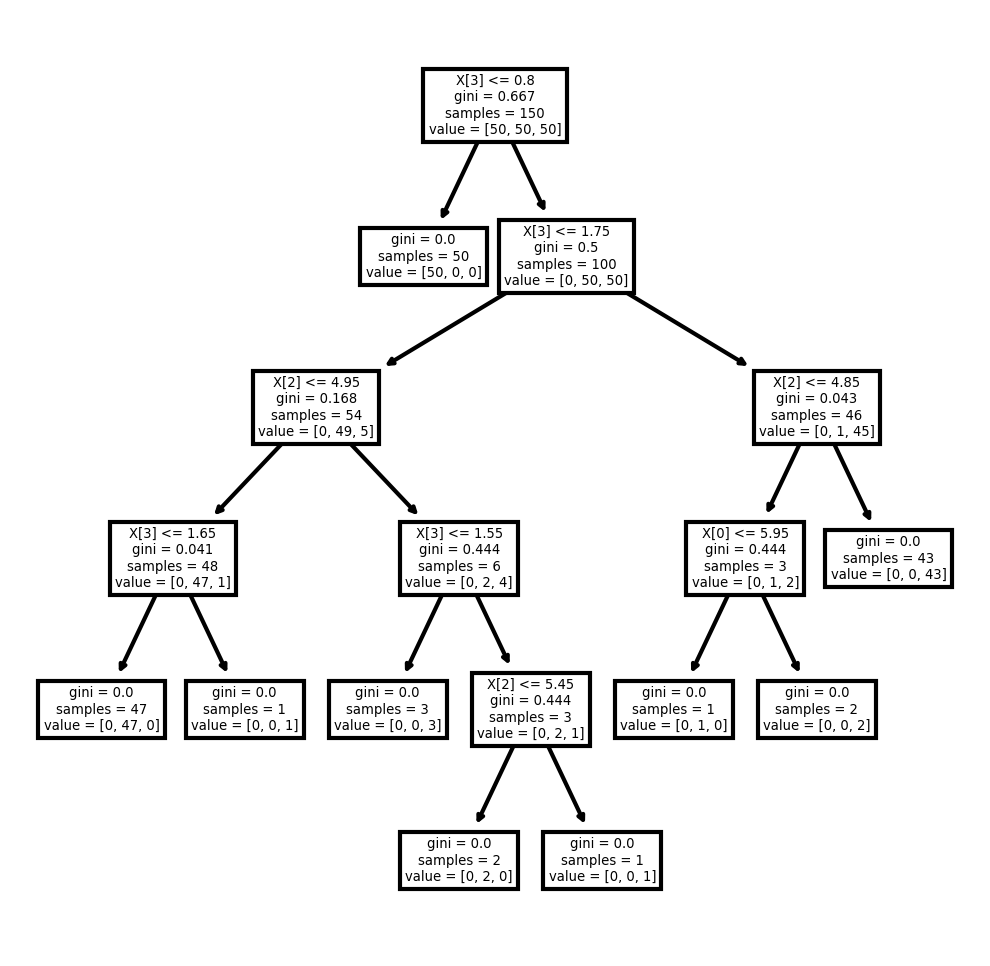

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree);
fig.savefig('imagename.png')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Find the two most important features according to the decision tree output.

</div>

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
dtree.feature_importances_

array([0.01333333, 0.        , 0.06405596, 0.92261071])

petal length (cm),petal width (cm) are the important features

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Train a decision tree based on the two most important features, and plot the decision boundary including data samples.

</div>

In [38]:
data=df.iloc[:,2:]

In [39]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [40]:
dtree=DecisionTreeClassifier()
dtree.fit(data,y)

DecisionTreeClassifier()

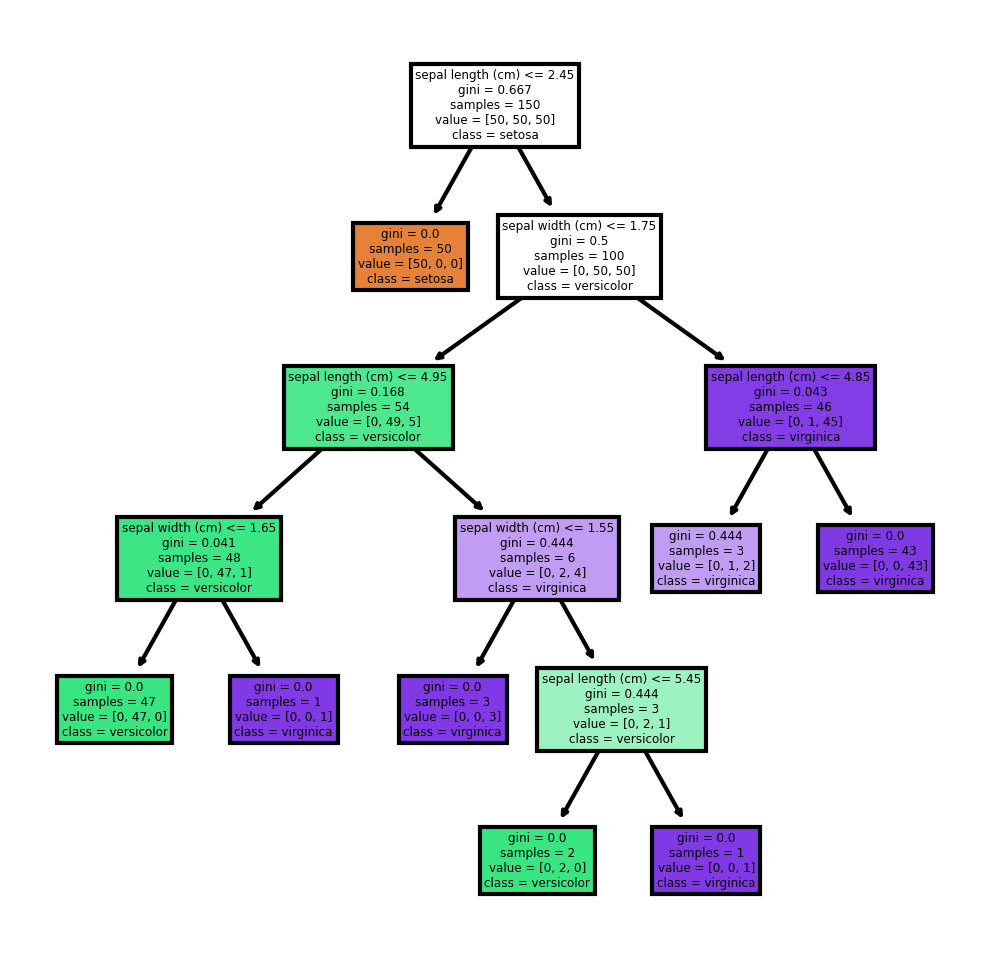

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True);
fig.savefig('imagename.png')

In [64]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<div class="alert alert-block alert-warning">

### Bayesian Network


</div>

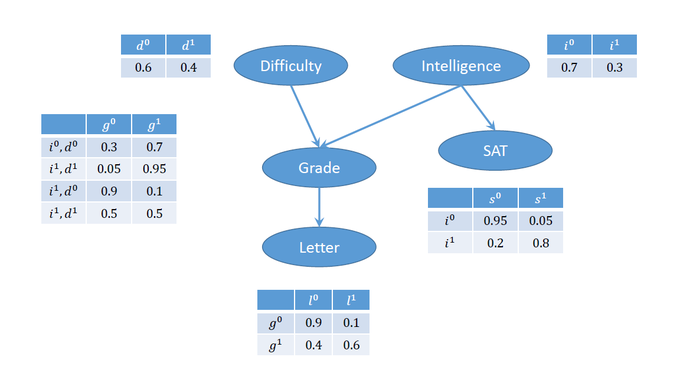

In [42]:
Image("Student model.png")

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Difficulty and Intelligence
- Join probability of Difficulty and Intelligence given Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [43]:
#Creating the Bayesian network using pomegranate API
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
model=BayesianModel([('Difficulty','Grade'),('Intelligence','Grade'),('Intelligence','SAT'),('Grade','Letter')])

In [44]:
probability=BayesianModel([('difficulty','grade'),('intelligent','sat'),('grade','letter')])

In [45]:
difficulty=TabularCPD(variable='Difficulty', variable_card=2,values=[[0.6],[0.4]])
intelligence=TabularCPD(variable='Intelligence', variable_card=2,values=[[0.7],[0.3]])
grades=TabularCPD(variable='Grade', variable_card=2,values=[[0.3,0.05,0.9,0.5],[0.7,0.95,0.1,0.5]],
                      evidence=['Difficulty','Intelligence'],evidence_card=[2,2])
SAT=TabularCPD(variable='SAT',variable_card=2,values=[[0.95,0.2],[0.05,0.8]],evidence=['Intelligence'],
                   evidence_card=[2])
letter=TabularCPD(variable='Letter',variable_card=2,values=[[0.9,0.4],[0.1,0.6]],evidence=['Grade'],
                      evidence_card=[2])

In [46]:
model.add_cpds(difficulty,intelligence,grades,SAT,letter)
model.check_model()

True

In [47]:
from pgmpy.inference import VariableElimination
interfer=VariableElimination(model)
difficultydist=interfer.query(['Difficulty'])
print(difficultydist)

Eliminating: Grade: 100%|███████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 802.20it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.6000 |
+---------------+-------------------+
| Difficulty(1) |            0.4000 |
+---------------+-------------------+


In [48]:
from pgmpy.inference import VariableElimination
interfer=VariableElimination(model)
intelligencedist=interfer.query(['Intelligence'])
print(intelligencedist)

Eliminating: Grade: 100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1002.64it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.7000 |
+-----------------+---------------------+
| Intelligence(1) |              0.3000 |
+-----------------+---------------------+


In [49]:
joint_difficulty_intelligence=difficultydist*intelligencedist
print(joint_difficulty_intelligence)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4200 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.1800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.2800 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.1200 |
+---------------+-----------------+--------------------------------+


In [50]:
interfer = VariableElimination(model)
D_dist_givenGrade = interfer.query(['Difficulty'],evidence={'Grade':1})
print(D_dist_givenGrade)

Eliminating: Intelligence: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 751.85it/s]

+---------------+-------------------+
| Difficulty    |   phi(Difficulty) |
+===============+===================+
| Difficulty(0) |            0.8409 |
+---------------+-------------------+
| Difficulty(1) |            0.1591 |
+---------------+-------------------+


In [51]:
interfer = VariableElimination(model)
I_dist_givenGrade = interfer.query(['Intelligence'],evidence={'Grade':1})
print(I_dist_givenGrade)

Eliminating: SAT: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 751.76it/s]

+-----------------+---------------------+
| Intelligence    |   phi(Intelligence) |
+=================+=====================+
| Intelligence(0) |              0.5823 |
+-----------------+---------------------+
| Intelligence(1) |              0.4177 |
+-----------------+---------------------+


In [52]:
jpd_givenGrade=D_dist_givenGrade*I_dist_givenGrade
print(jpd_givenGrade)

+---------------+-----------------+--------------------------------+
| Difficulty    | Intelligence    |   phi(Difficulty,Intelligence) |
+===============+=================+================================+
| Difficulty(0) | Intelligence(0) |                         0.4896 |
+---------------+-----------------+--------------------------------+
| Difficulty(0) | Intelligence(1) |                         0.3512 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(0) |                         0.0927 |
+---------------+-----------------+--------------------------------+
| Difficulty(1) | Intelligence(1) |                         0.0665 |
+---------------+-----------------+--------------------------------+


the joint probability difficulty vs intelligence is 0.0665

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Grade and SAT
- Join probability of Grade and SAT given Intelligence

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [53]:
interfer = VariableElimination(model)
Grade_dist = interfer.query(['Grade'])
print(Grade_dist)

Eliminating: Difficulty: 100%|██████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 802.16it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.4470 |
+----------+--------------+
| Grade(1) |       0.5530 |
+----------+--------------+


In [54]:
Sat_dist = interfer.query(['SAT'])
print(Sat_dist)

Eliminating: Intelligence: 100%|████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 801.97it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.7250 |
+--------+------------+
| SAT(1) |     0.2750 |
+--------+------------+


In [55]:
jpd=Grade_dist*Sat_dist
print(jpd)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.3241 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1229 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.4009 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.1521 |
+----------+--------+------------------+


In [56]:
G_dist_I = interfer.query(['Grade'],evidence={'Intelligence':1})
print(G_dist_I)

Eliminating: SAT: 100%|████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1003.26it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.2300 |
+----------+--------------+
| Grade(1) |       0.7700 |
+----------+--------------+


In [57]:
S_dist_I = interfer.query(['SAT'],evidence={'Intelligence':1})
print(S_dist_I)

Eliminating: Grade: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1002.78it/s]

+--------+------------+
| SAT    |   phi(SAT) |
+========+============+
| SAT(0) |     0.2000 |
+--------+------------+
| SAT(1) |     0.8000 |
+--------+------------+


In [58]:
jpd_I=G_dist_I*S_dist_I
print(jpd_I)

+----------+--------+------------------+
| Grade    | SAT    |   phi(Grade,SAT) |
+==========+========+==================+
| Grade(0) | SAT(0) |           0.0460 |
+----------+--------+------------------+
| Grade(0) | SAT(1) |           0.1840 |
+----------+--------+------------------+
| Grade(1) | SAT(0) |           0.1540 |
+----------+--------+------------------+
| Grade(1) | SAT(1) |           0.6160 |
+----------+--------+------------------+


    the joint probability distribution around grade vs sat will be 0.6160

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Letter and Difficulty
- Join probability of Letter and Difficulty Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [59]:
Ldist = interfer.query(['Letter'])
print(Ldist)

Eliminating: Grade: 100%|███████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 802.47it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.6235 |
+-----------+---------------+
| Letter(1) |        0.3765 |
+-----------+---------------+


In [61]:
jpd=Ldist*difficultydist
print(jpd)

+-----------+---------------+--------------------------+
| Letter    | Difficulty    |   phi(Letter,Difficulty) |
+===========+===============+==========================+
| Letter(0) | Difficulty(0) |                   0.3741 |
+-----------+---------------+--------------------------+
| Letter(0) | Difficulty(1) |                   0.2494 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(0) |                   0.2259 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(1) |                   0.1506 |
+-----------+---------------+--------------------------+


In [62]:
L_dist_givenGrade = interfer.query(['Letter'],evidence={'Grade':1})
print(L_dist_givenGrade)

Eliminating: Intelligence: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 751.98it/s]

+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.4000 |
+-----------+---------------+
| Letter(1) |        0.6000 |
+-----------+---------------+


In [63]:
jpdLD_givenGrade=L_dist_givenGrade*D_dist_givenGrade
print(jpdLD_givenGrade)

+-----------+---------------+--------------------------+
| Letter    | Difficulty    |   phi(Letter,Difficulty) |
+===========+===============+==========================+
| Letter(0) | Difficulty(0) |                   0.3363 |
+-----------+---------------+--------------------------+
| Letter(0) | Difficulty(1) |                   0.0637 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(0) |                   0.5045 |
+-----------+---------------+--------------------------+
| Letter(1) | Difficulty(1) |                   0.0955 |
+-----------+---------------+--------------------------+


from the above table we can see that joint probability distribution is 0.0955